STUDI KASUS: Customer Churn

Terdapat dataset konsumen dengan 2 kategori churn, yaitu:

pelanggan aktif (0) dan
pelanggan yang sudah berhenti (1)

In [1]:
# import library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv("./dataset/customer_churn_dataset.csv", index_col=['customer_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 285fae8412c4720a0c79d95f98434422 to 2c5bc32bc9a9c393d393bfc11c409b0d
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10000 non-null  object 
 1   reload_1     10000 non-null  float64
 2   reload_2     10000 non-null  float64
 3   video        10000 non-null  float64
 4   music        10000 non-null  float64
 5   games        10000 non-null  float64
 6   chat_1       10000 non-null  float64
 7   chat_2       10000 non-null  float64
 8   socmed_1     10000 non-null  float64
 9   socmed_2     10000 non-null  float64
 10  internet     10000 non-null  float64
 11  days_active  10000 non-null  int64  
 12  tenure       10000 non-null  int64  
 13  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 1.1+ MB


In [3]:
df.churn.value_counts()

churn
0    8000
1    2000
Name: count, dtype: int64

In [4]:
df.describe()

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,5.028051e+04,5.096699e+04,5560.903790,5979.015977,6404.242827,2.291405e+04,2.218400e+04,374.057230,389.259640,2.373712e+04,7.899300,1483.231700,0.20000
std,3.450995e+05,2.432706e+05,32978.159388,34257.681265,30453.580655,1.081201e+05,1.063451e+05,4589.763779,4154.196312,1.226807e+05,6.480552,1760.124187,0.40002
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,181.000000,0.00000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,430.000000,0.00000
50%,4.400000e+02,2.790335e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,8.000000,776.000000,0.00000
75%,2.600033e+04,3.265121e+04,0.000000,0.000000,0.330000,3.003000e+03,4.500000e+03,0.000000,0.000000,3.682525e+03,15.000000,1788.000000,0.00000
max,2.438088e+07,1.245727e+07,693999.600000,768998.200000,674665.630000,3.899875e+06,4.565244e+06,301620.000000,294525.000000,5.799989e+06,15.000000,8938.000000,1.00000


Library ML umumnya hanya bisa memproses data numerik. Karena hal itu, kita perlu mengubah kolom bernilai kategorik menjadi nilai numerik.

Pada kolom product nilai atribut:

Kartu A didefinisikan sebagai 0
Kartu B didefinisikan sebagai 1, dan
Kartu C didefinisikan sebagai 2

In [8]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C': 2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


Selanjutnya, pisahkan X dan Y dari dataset. Ubah DataFrame menjadi numpy array dengan method .values.

In [9]:
#atribute predictor/feature
X = df.iloc[:, :-1].values
#atribute target/label
Y = df.iloc[:, -1].values


K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut.

Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [10]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

# X yang telah di normalisasi 
print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik

Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Kali ini kita membagi dataset dengan komposisi sebesar 80% data training dan 20% data testing.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)

print('train set', X_train.shape, Y_train.shape )
print('test set', X_test.shape, Y_test.shape )

train set (8000, 13) (8000,)
test set (2000, 13) (2000,)


Training Model

Pertama, tentukan nilai k. Kita akan coba dengan nikai k=7:

In [12]:
k=4

# train model
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

Perhitungan Akurasi

Pada klasifikasi, nilai akurasi klasifikasi secara sederhana dapat dihitung dengan:

membandingkan kelas hasil prediksi model dengan kelas sebenarnya/actual class.

In [13]:
y_pred = model_knn.predict(X_test)
print(y_pred)

[1 0 0 ... 1 0 0]


Accuracy train set dan test set tidak terpaut jauh. Accuracy keduanya juga sangat tinggi.

Bisa dikatakan model dengan k=7 sudah Good Fit.

Note: Pada praktiknya kita harus memilih metrics yang cocok untuk kasus customer churn, apakah accuracy, precision, atau recall. Supaya lebih mudah, kita hanya memilih metric accuracy.

In [14]:
print('Train set Accuracy: ', metrics.accuracy_score(Y_train, model_knn.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(Y_test, y_pred))

Train set Accuracy:  0.9415
Test set Accuracy:  0.9275


Klasifikasi Data Baru

Model yang sudah good fit bisa kita gunakan untuk memprediksi data baru.

In [15]:
# Terdapat 13 feauture
product = int (input('input product: '))
reload_1 = float(input('input reload_1: '))
reload_2 = float(input('input reload_2: '))
video = float(input('input video: '))
music = float(input('input music: '))
games = float(input('input games: '))
chat_1 = float(input('input chat_1: '))
chat_2 = float(input('input chat_2: '))
socmed_1 = float(input('input socmed_1: '))
socmed_2 = float(input('input socmed_2: '))
internet = float(input('input internet: '))
days_active = int(input('input days_active: '))
tenure = float(input('input tenure: '))

new_data = [[product, reload_1, reload_2, video, music, games, chat_1, chat_2, socmed_1, socmed_2, internet, days_active, tenure]]

#prediksi data baru
hasil_prediksi = model_knn.predict(new_data)

#cetak hasil prediksi
if hasil_prediksi == 0:
    print('Input product :',product)
    print('input reload_1 :',reload_1)
    print('input reload_2 :',reload_2)
    print('input video :',video)
    print('input music :',music)
    print('input games :',games)
    print('input chat_1 :',chat_1)
    print('input chat_2 :',chat_2)
    print('input socmed_1 :',socmed_1)
    print('input socmed_2 :',socmed_2)
    print('input internet :',internet)
    print('input days_active :',days_active)
    print('input tenure :',tenure)

    print('\n Customer diprediksi tidak berhenti berlangganan (tetap aktif)')

elif hasil_prediksi == 1:
    print('Input product :',product)
    print('input reload_1 :',reload_1)
    print('input reload_2 :',reload_2)
    print('input video :',video)
    print('input music :',music)
    print('input games :',games)
    print('input chat_1 :',chat_1)
    print('input chat_2 :',chat_2)
    print('input socmed_1 :',socmed_1)
    print('input socmed_2 :',socmed_2)
    print('input internet :',internet)
    print('input days_active :',days_active)
    print('input tenure :',tenure)
    
    print('\n Customer diprediksi berhenti berlangganan (berhenti berlangganan)')

Input product : 2
input reload_1 : 50.0
input reload_2 : 25.0
input video : 1.0
input music : 20.0
input games : 10.0
input chat_1 : 2.0
input chat_2 : 10.0
input socmed_1 : 12.0
input socmed_2 : 14.0
input internet : 14.0
input days_active : 16
input tenure : 13.0

 Customer diprediksi tidak berhenti berlangganan (tetap aktif)


## MENCARI NILAI K TERBAIK
Performa dari model K-NN sangat bergantung dengan nilai K.

Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai k dari k=1 sampai dengan k=10.

In [16]:
ks = 11
accuracies = []
precisions = []
recalls = []

#loops dari K=1 sampai K=10
for k in range(1, ks):
    knn = KNeighborsClassifier(n_neighbors=k)

    #train model
    knn.fit(X_train, Y_train)

    #membuat prediksi dari testing data
    y_hat = knn.predict(X_test)

    #menyimpan hasil pengujian
    accuracies.append(metrics.accuracy_score(Y_test, y_hat))
    precisions.append(metrics.precision_score(Y_test, y_hat))
    recalls.append(metrics.recall_score(Y_test, y_hat))

    #cetak hasil pengujian
    print('k =', k)
    print('accuracy =', metrics.accuracy_score(Y_test, y_hat))
    print('precision =', metrics.precision_score(Y_test, y_hat))
    print('recall =', metrics.recall_score(Y_test, y_hat))

k = 1
accuracy = 0.9235
precision = 0.8181818181818182
recall = 0.808252427184466
k = 2
accuracy = 0.9265
precision = 0.8978978978978979
recall = 0.7257281553398058
k = 3
accuracy = 0.93
precision = 0.8597883597883598
recall = 0.7888349514563107
k = 4
accuracy = 0.9275
precision = 0.8961424332344213
recall = 0.7330097087378641
k = 5
accuracy = 0.9285
precision = 0.862533692722372
recall = 0.7766990291262136
k = 6
accuracy = 0.927
precision = 0.8982035928143712
recall = 0.7281553398058253
k = 7
accuracy = 0.9305
precision = 0.8823529411764706
recall = 0.7645631067961165
k = 8
accuracy = 0.926
precision = 0.9
recall = 0.720873786407767
k = 9
accuracy = 0.9265
precision = 0.8753541076487252
recall = 0.75
k = 10
accuracy = 0.923
precision = 0.9006211180124224
recall = 0.7038834951456311


Kita juga bisa menampilkan grafik / plot-nya untuk mempermudah pembacaan hasil pengujian

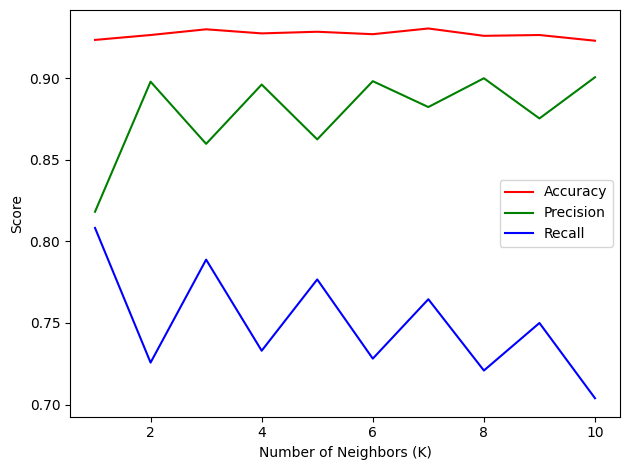

In [17]:
#Line chart
plt.plot(range(1, ks), accuracies, 'r')
plt.plot(range(1, ks), precisions, 'g')
plt.plot(range(1, ks), recalls, 'b')
plt.legend(('Accuracy', 'Precision', 'Recall'))
plt.ylabel('Score')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi terbaik adalah", max_accuracy, "dengan nilai k =", accuracies.index(max_accuracy) + 1)
print("Precision terbaik adalah", max_precision, "dengan nilai k =", precisions.index(max_precision) + 1)
print("Recall terbaik adalah", max_recall, "dengan nilai k =", recalls.index(max_recall) + 1)


Akurasi terbaik adalah 0.9305 dengan nilai k = 7
Precision terbaik adalah 0.9006211180124224 dengan nilai k = 10
Recall terbaik adalah 0.808252427184466 dengan nilai k = 1
